In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/VAP/train.csv',header=None)
test = pd.read_csv('/content/drive/MyDrive/VAP/test.csv',header=None)
dev = pd.read_csv('/content/drive/MyDrive/VAP/dev.csv')

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
train

,0,1,2
0,text,slot,intent
1,listen to westbam alumb allergic on google music,O O B-artist O B-album O B-service I-service,PlayMusic
2,add step to me to the 50 clásicos playlist,O B-entity_name I-entity_name I-entity_name O ...,AddToPlaylist
3,i give this current textbook a rating value of...,O O O B-object_select B-object_type O O O O B-...,RateBook
4,play the song little robin redbreast,O O B-music_item B-track I-track I-track,PlayMusic
...,...,...,...
13080,i want to eat choucroute at a brasserie for 8,O O O O B-served_dish O O B-restaurant_type O ...,BookRestaurant
13081,play funky heavy bluesy,O B-playlist I-playlist I-playlist,PlayMusic
13082,rate the current album 2 points out of 6,O O B-object_select B-object_type B-rating_val...,RateBook
13083,go to the photograph the inflated tear,O O O B-object_type B-object_name I-object_nam...,SearchCreativeWork


In [5]:
test = test.drop([1], axis=1)
test = test.rename(columns={2: 0 , 0:1})
test = test.iloc[:,[1,0]]

train = train.drop([1], axis=1)
train = train.rename(columns={2: 0 , 0:1})
train = train.iloc[:,[1,0]]

# dev = dev.drop([1], axis=1)
# dev = dev.rename(columns={2: 0 , 0:1})
# dev = dev.iloc[:,[1,0]]

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
test

,0,1
0,intent,text
1,AddToPlaylist,add sabrina salerno to the grime instrumentals...
2,BookRestaurant,i want to bring four people to a place that s ...
3,AddToPlaylist,put lindsey cardinale into my hillary clinton ...
4,GetWeather,will it snow in mt on june 13 2038
...,...,...
696,SearchCreativeWork,find a tv series called armageddon summer
697,SearchCreativeWork,find politicsnation with al sharpton
698,RateBook,rate this album 0 points out of 6
699,AddToPlaylist,add leah kauffman to my uncharted 4 nathan dra...


In [8]:
test.drop_duplicates
train.drop_duplicates

<bound method DataFrame.drop_duplicates of                         0                                                  1
0                  intent                                               text
1               PlayMusic   listen to westbam alumb allergic on google music
2           AddToPlaylist         add step to me to the 50 clásicos playlist
3                RateBook  i give this current textbook a rating value of...
4               PlayMusic               play the song little robin redbreast
...                   ...                                                ...
13080      BookRestaurant      i want to eat choucroute at a brasserie for 8
13081           PlayMusic                            play funky heavy bluesy
13082            RateBook           rate the current album 2 points out of 6
13083  SearchCreativeWork             go to the photograph the inflated tear
13084            RateBook                     rate richard carvel 4 out of 6

[13085 rows x 2 columns]>

In [9]:
print(train.shape,test.shape)


(13085, 2) (701, 2)


In [10]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=d60f05cdc600c16027e0e1657671eab7b22387785f5a32ac9453d5f40960d3a3
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [11]:
train.head()

,0,1
0,intent,text
1,PlayMusic,listen to westbam alumb allergic on google music
2,AddToPlaylist,add step to me to the 50 clásicos playlist
3,RateBook,i give this current textbook a rating value of...
4,PlayMusic,play the song little robin redbreast


In [12]:
len(train)

13085

In [13]:
import numpy as np
labels,counts=np.unique(train[0],return_counts=True)

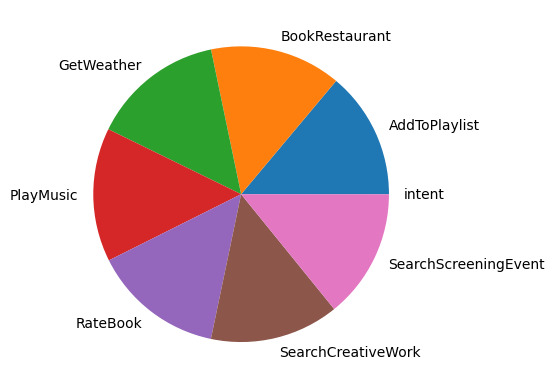

In [14]:
import matplotlib.pyplot as plt

plt.pie(counts, labels = labels)
plt.show() 

In [15]:
from sklearn.preprocessing import LabelEncoder as LE 
le = LE()
le.fit(train[0])
print(le.classes_)

['AddToPlaylist' 'BookRestaurant' 'GetWeather' 'PlayMusic' 'RateBook'
 'SearchCreativeWork' 'SearchScreeningEvent' 'intent']


In [16]:
train[0] = le.transform(train[0])
test[0] = le.transform(test[0])

In [17]:
train


,0,1
0,7,text
1,3,listen to westbam alumb allergic on google music
2,0,add step to me to the 50 clásicos playlist
3,4,i give this current textbook a rating value of...
4,3,play the song little robin redbreast
...,...,...
13080,1,i want to eat choucroute at a brasserie for 8
13081,3,play funky heavy bluesy
13082,4,rate the current album 2 points out of 6
13083,5,go to the photograph the inflated tear


In [18]:
# from sentence_transformers import InputExample
# from tqdm import tqdm
# train_examples = [ ]
# for i in tqdm(range(len(train))):
#   train_examples.append(InputExample(texts=[train[1][i],''], label=[train[0][i]] ))

In [ ]:
# train_examples

In [ ]:
# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=10)

In [19]:
# from sentence_transformers import SentenceTransformer

# model_id = "sentence-t5-base"
# model = SentenceTransformer(model_id)

import pickle

loaded_model = pickle.load(open("/content/drive/MyDrive/VAP/bert_model.pkl", 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [20]:
import numpy as np

len(np.unique(train[0],return_counts=True)[0])

8

In [21]:
# from sentence_transformers import losses

# train_loss = losses.SoftmaxLoss(model,sentence_embedding_dimension=768,num_labels=8)

In [22]:
# torch.cuda.empty_cache()

In [23]:
# !pip install GPUtil

In [24]:
# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# #free_gpu_cache() 
# gpu_usage()


In [25]:
# from torch import optim
# from torch import nn
# import torch

# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [26]:
# model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=10,optimizer_class=torch.optim.AdamW) 

In [27]:
# model = open("/kaggle/working/saved_model.pkl",'rb')
# object_file = pickle.load(model)
# mdoel.close()

In [30]:
model=loaded_model

In [31]:
train

,0,1
0,7,text
1,3,listen to westbam alumb allergic on google music
2,0,add step to me to the 50 clásicos playlist
3,4,i give this current textbook a rating value of...
4,3,play the song little robin redbreast
...,...,...
13080,1,i want to eat choucroute at a brasserie for 8
13081,3,play funky heavy bluesy
13082,4,rate the current album 2 points out of 6
13083,5,go to the photograph the inflated tear


In [32]:
# model = SentenceTransformer('t5-base')

In [33]:
train_x = model.encode(train[1])

In [34]:
train_y = train[0]

In [35]:
test_x = model.encode(test[1])

In [36]:
test_y = test[0]

In [37]:
test_y

0      7
1      0
2      1
3      0
4      2
      ..
696    5
697    5
698    4
699    0
700    4
Name: 0, Length: 701, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
clf = LogisticRegression(random_state=0).fit(train_x, train_y)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
clf.score(test_x,test_y)

0.9472182596291013

In [47]:
from sklearn.metrics import classification_report
labels = np.unique(train_y,return_counts=True)[0]
print(classification_report(test_y,clf.predict(test_x),labels=labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.98      1.00      0.99        92
           2       1.00      0.97      0.99       104
           3       0.93      0.94      0.94        86
           4       1.00      1.00      1.00        80
           5       0.83      0.90      0.86       107
           6       0.92      0.86      0.89       107
           7       1.00      1.00      1.00         1

    accuracy                           0.95       701
   macro avg       0.96      0.96      0.96       701
weighted avg       0.95      0.95      0.95       701



In [48]:
# model = SentenceTransformer('t5-base')

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
ros = RandomOverSampler(random_state=42)

In [51]:
train_x,train_y=ros.fit_resample(train_x,train_y)

In [52]:
np.unique(train_y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1914, 1914, 1914, 1914, 1914, 1914, 1914, 1914]))

In [53]:
train_x.shape

(15312, 768)

In [54]:
from sklearn.decomposition import PCA


In [55]:
pca = PCA(n_components=3)


In [56]:
visual_x = pca.fit_transform(train_x)

In [57]:
visual_x.shape

(15312, 3)

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


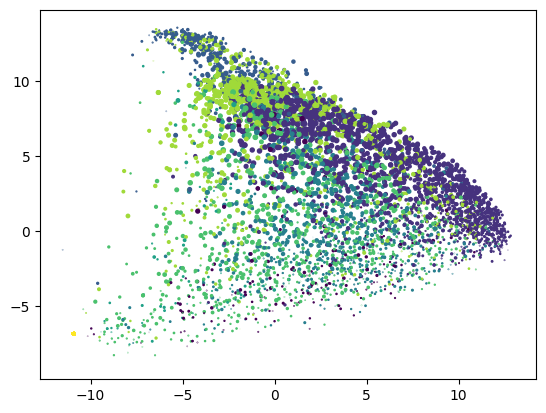

In [58]:
import matplotlib.pyplot as plt

plt.scatter(visual_x[:,0],visual_x[:,1],visual_x[:,2],c=train_y)

In [59]:
visual_x = np.array(visual_x)

In [60]:
visual_x[:,1]

array([-6.8555427,  2.849793 , -5.36079  , ..., -6.855629 , -6.855629 ,
       -6.855629 ], dtype=float32)

In [61]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

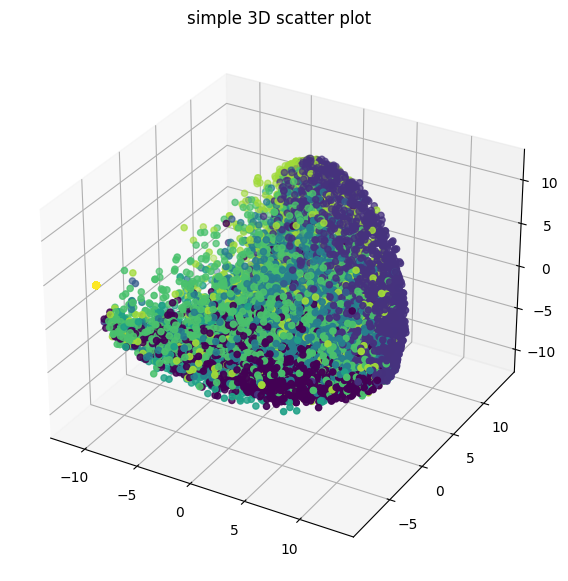

In [62]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(visual_x[:,0], visual_x[:,1], visual_x[:,2], c = train_y)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()